# <center> Short-term Rental Prices in NYC EDA

## Outline
- [ 1 - Packages](#1)
- [ 2 - Data Load](#2)
- [ 3 - EDA](#3)
- [ 4 - Data Cleaning](#4)

<a name="1"></a>
## 1 - Packages

In [1]:
import wandb
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

<a name="2"></a>
## 2 - Data Load

In [24]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: wandb version 0.13.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


<a name="3"></a>
## 3 - EDA

In [2]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [26]:
df.shape

(20000, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [30]:
# checking if there are any duplicates in train
df.duplicated().sum()

0

In [31]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,1.377446,6.955450,112.901200
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,1.683006,32.433831,131.762226
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,27.950000,327.000000,365.000000


In [41]:
cate_feat = ['neighbourhood_group', 'neighbourhood', 'room_type']
num_feat = ['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
text = ['name']

In [42]:
# finding out if any feature has zero variance (categorical feature)
print("Categorical features having only one unique value:")
for feature in cate_feat:
    if df[feature].nunique() == 1:
        print(feature)

Categorical features having only one unique value:


In [43]:
# we will consider the numerical features having less than 20 unique values as categorical features
for feature in num_feat:
    if df[feature].nunique() <= 20:
        cate_feat.append(feature)
        num_feat.remove(feature)

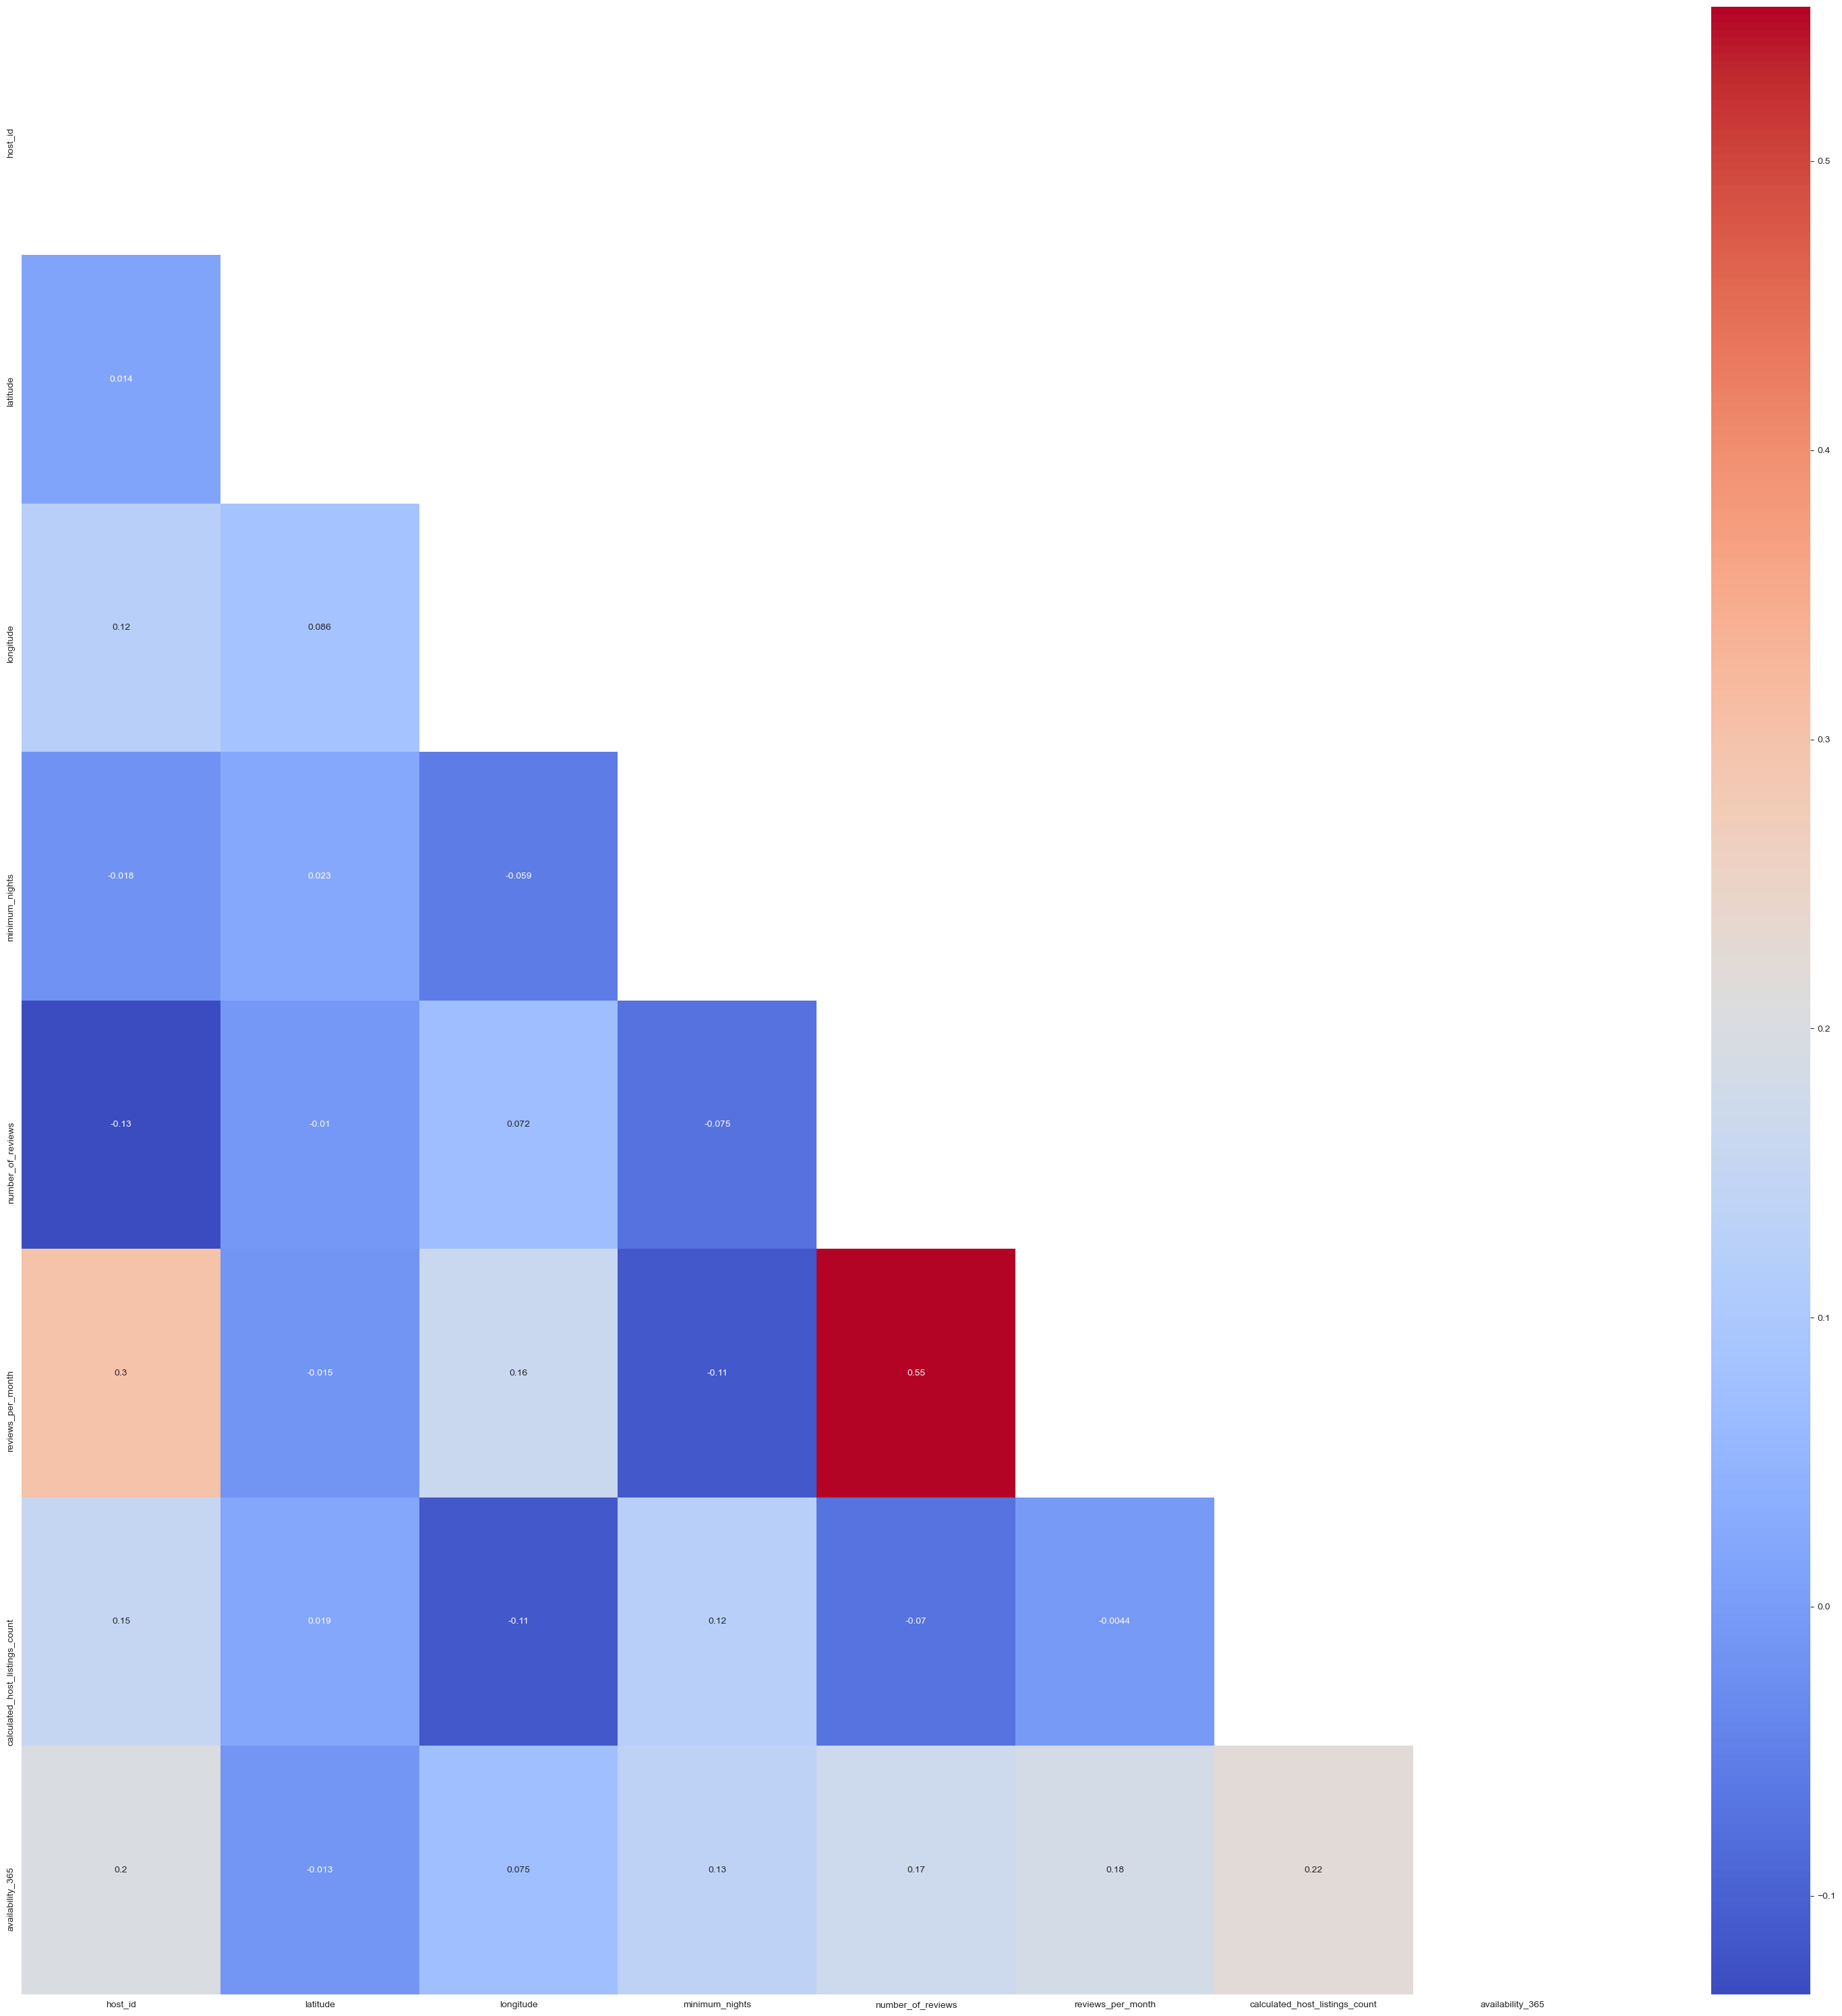

In [44]:
# checking the correlation between the numerical independent features and depedent features
sns.set_style('whitegrid')
plt.figure(figsize=(30,30))
corr = df[num_feat].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

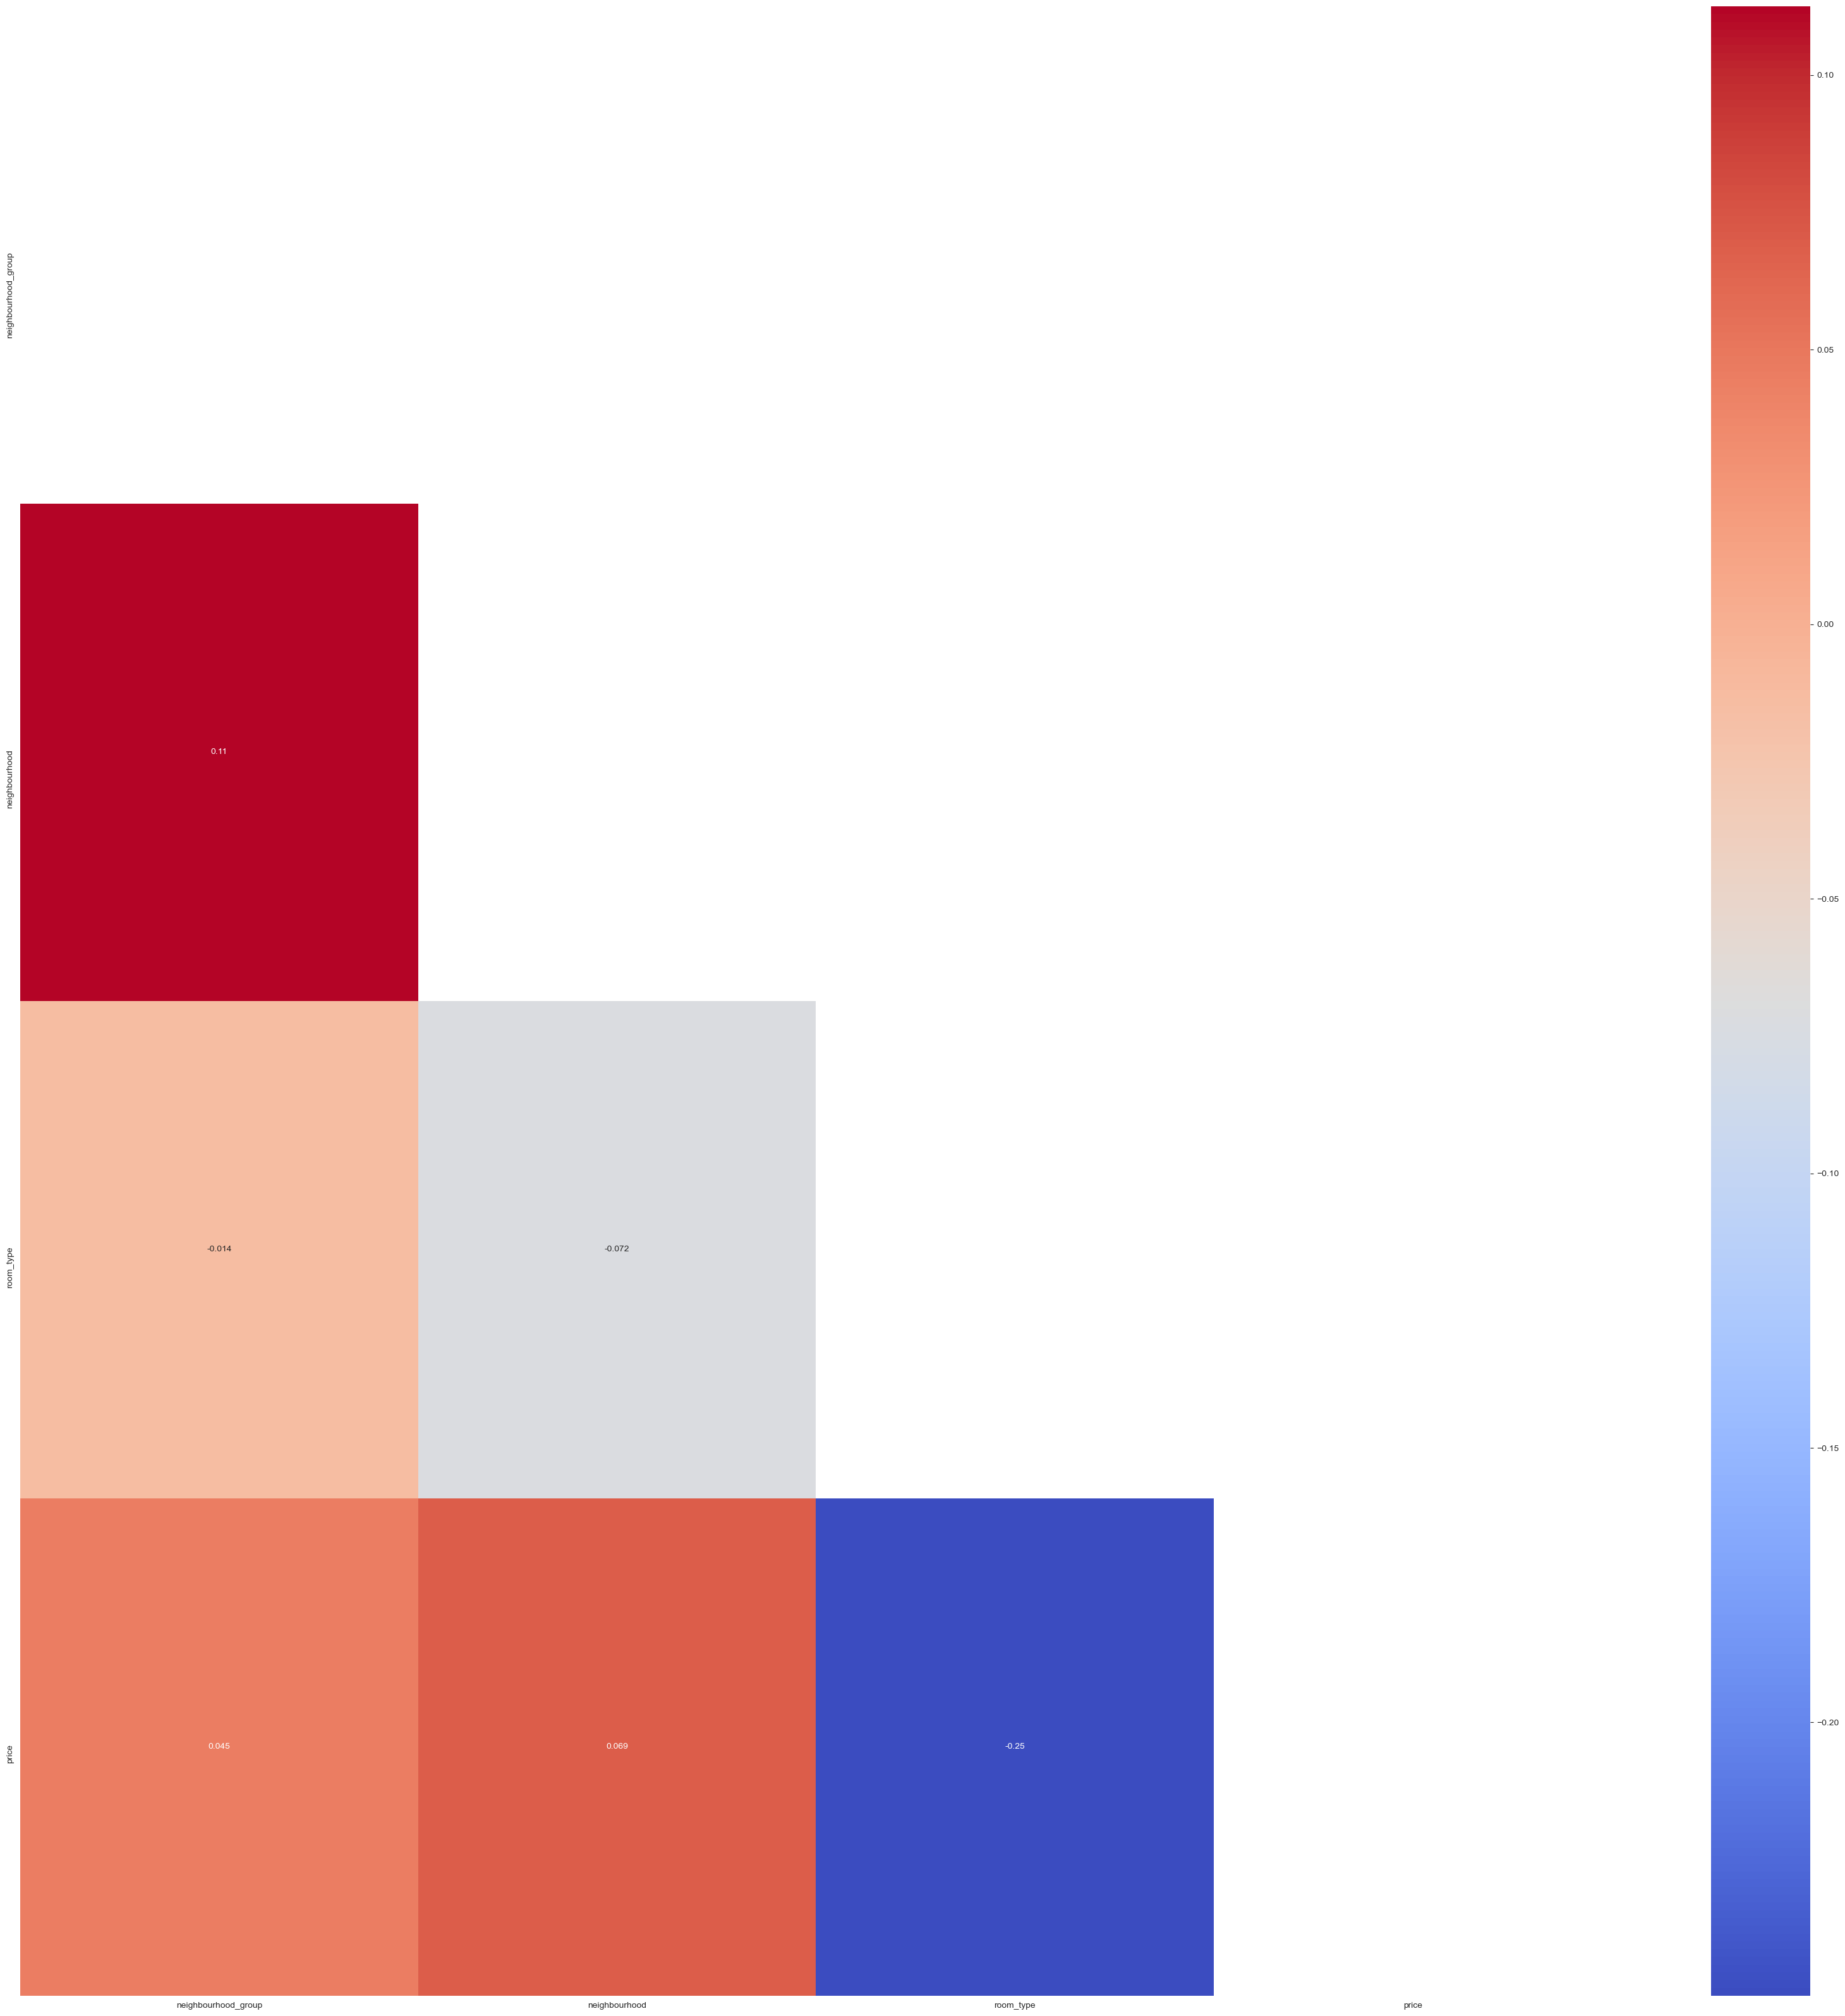

In [45]:
# checking the correlation between the categorical independent features and depedent features
sns.set_style('whitegrid')

df1 = pd.DataFrame(OrdinalEncoder().fit_transform(df[cate_feat].astype(str)), columns=cate_feat) # dataframe having categorical feature
df2 = pd.DataFrame(df['price'], columns=['price']) # dataframe having dependent feature
df_cat = pd.concat([df1, df2], axis=1) # dataframe having all the categorical features and one dependent feature

plt.figure(figsize=(32,32))
corr = df_cat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

/opt/homebrew/Caskroom/miniforge/base/envs/mlflow-4360825da6415c180f5a7abe7f688dd71c29c86a/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/mlflow-4360825da6415c180f5a7abe7f688dd71c29c86a/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/mlflow-4360825da6415c180f5a7abe7f688dd71c29c86a/lib/python3.9/site-packages/seaborn/distributio

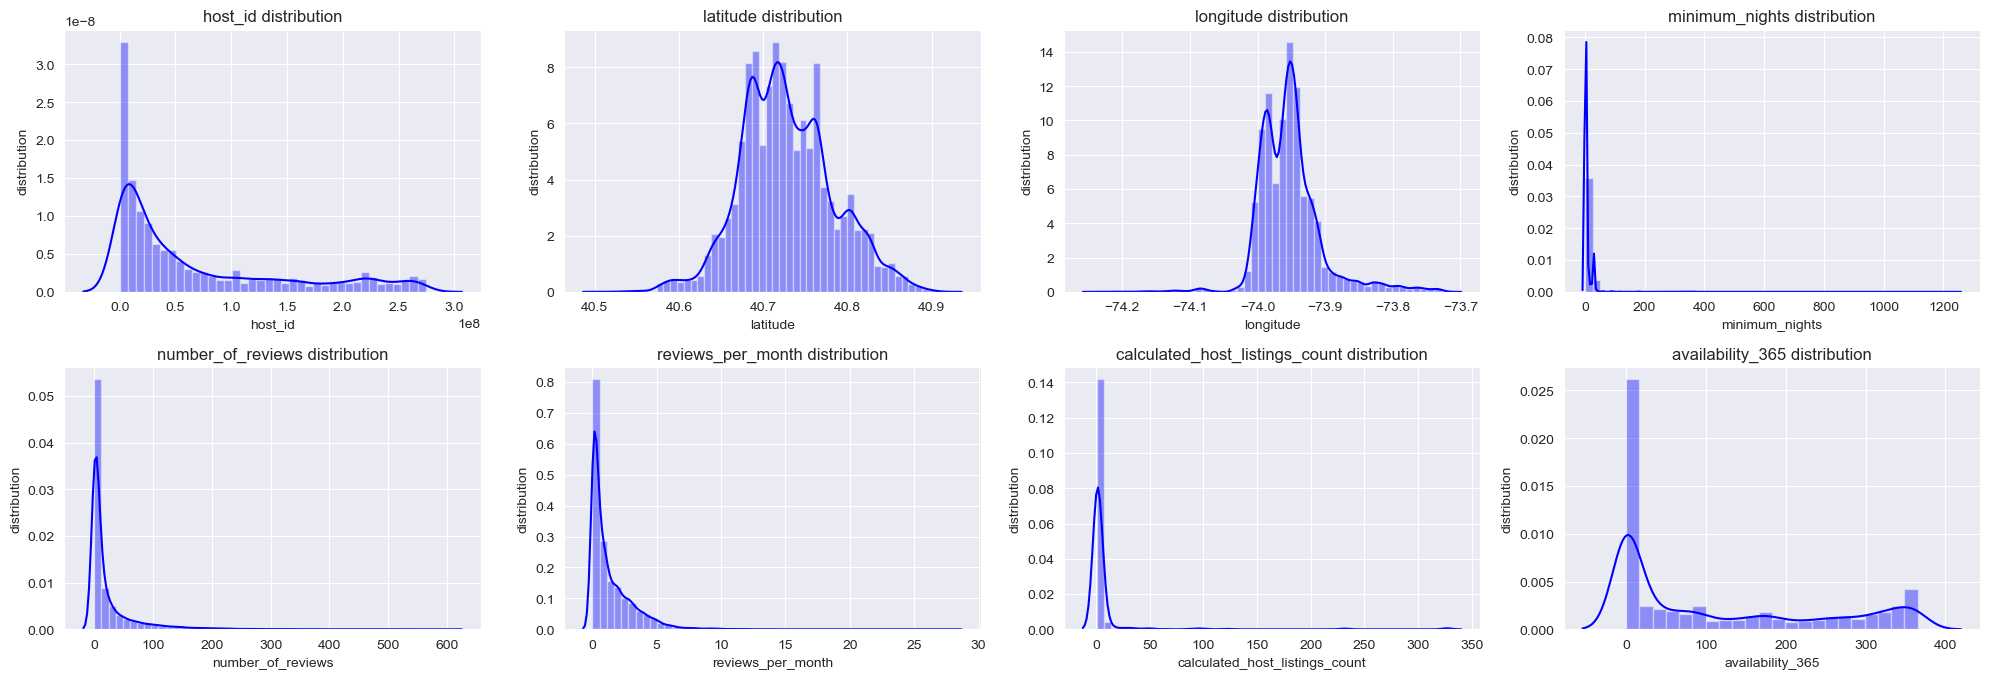

In [46]:
# checking the distribution of notable numerical features
sns.set_style('darkgrid')
plt.figure(figsize=(20,20))
for index, feature in enumerate(num_feat):
    plt.subplot(6,4,index+1)
    sns.distplot(df[feature],kde=True, color='b')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")
plt.tight_layout()

In [54]:
# Looking for null values
print (df[cate_feat+num_feat+['price']].isnull().sum())

neighbourhood_group                  0
neighbourhood                        0
room_type                            0
host_id                              0
latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64


<a name="4"></a>
## 4 - Data Cleaning

In [55]:
# Impute nulls
df['reviews_per_month'].fillna(value=0, inplace=True)

In [56]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19001 non-null  int64  
 1   name                            18994 non-null  object 
 2   host_id                         19001 non-null  int64  
 3   host_name                       18993 non-null  object 
 4   neighbourhood_group             19001 non-null  object 
 5   neighbourhood                   19001 non-null  object 
 6   latitude                        19001 non-null  float64
 7   longitude                       19001 non-null  float64
 8   room_type                       19001 non-null  object 
 9   price                           19001 non-null  int64  
 10  minimum_nights                  19001 non-null  int64  
 11  number_of_reviews               19001 non-null  int64  
 12  last_review                     